Problem 2: Build a classification model to predict stroke (= 1 if a person had a stroke else 0).

**Source**

This dataset is obtained from Fedesoriano's page (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset),..


**References**

Analyzing the Performance of Stroke Prediction using ML Classification Algorithms (2021) by Gangavarapu Sailasya & Gorli L Aruna Kumari Source: https://thesai.org/Downloads/Volume12No6/Paper_62-Analyzing_the_Performance_of_Stroke_Prediction.pdf #(pickle model & flask p.6)

Stroke Disease Detection and Prediction Using Robust Learning Approaches (2021) by Tahia Tazin
and team. https://www.hindawi.com/journals/jhe/2021/7633381/ #(i)	Random forest (ii)	Decision tree (iii)	Voting classifier (iv)	Logistic regression

Stroke Risk Prediction with Machine Learning Techniques (2022) by Elias Dritsas* and Maria Trigka https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9268898/ 

PyCaret regressor for integrating missing values (2022) by Izzet Turkalp Akbasli https://www.kaggle.com/code/zzettrkalpakbal/pycaret-regressor-for-integrating-missing-values

A predictive analytics approach for stroke prediction using machine learning and neural networks (2022) by Soumyabrata Dev and team https://www.sciencedirect.com/science/article/pii/S2772442522000090 #(PCA & Robust)


# Part 1. Exploratory Data Analysis (EDA)

In EDA, we explore and visualize the data to gain insights into its distribution, patterns, and potential issues such as class imbalance. EDA helps us to understand the characteristics of the dataset and identify any preprocessing steps that might be needed.

**Attribute Information**
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_job", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [7]:
#Libraries needed
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title = "Pandas Profiling Report")

profile = ProfileReport(df, 
  title = "Pandas Profiling Report", 
  correlations = {
    "pearson": {"calculate": True},
    "spearman": {"calculate": True},
    "kendall": {"calculate": False},
    "cramers": {"calculate": True},
    "phi_k": {"calculate": False},
  },
) 
profile.to_widgets()

In [38]:
#The target variable in this dataset is 'stroke'. Checking on stroke data. 

stroke_counts = df['stroke'].value_counts()
stroke_counts

stroke
0    4861
1     249
Name: count, dtype: int64

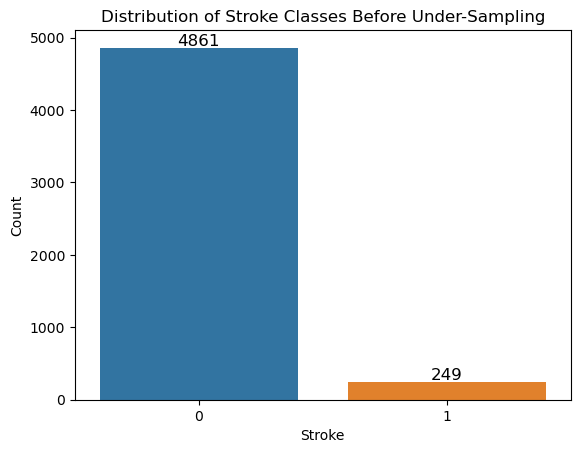

In [9]:
# Create the count plot using the under-sampled DataFrame
ax = sns.countplot(x='stroke', data=df)

# Calculate value counts for both classes
value_counts = df['stroke'].value_counts()

# Add value counts as text labels on the bars
for i, v in enumerate(value_counts):
    ax.text(i, v + (-20), str(v), ha='center', va='bottom', fontsize=12)

# Add title and labels
ax.set_title('Distribution of Stroke Classes Before Under-Sampling')
ax.set_xlabel('Stroke')
ax.set_ylabel('Count')

# Add legend
#ax.legend(title='Class', labels=['No Stroke (0)', 'Stroke (1)'])

# Show the plot
plt.show()

Above shows that dataset is imbalanced, as there is a significant difference in the number of samples between the two classes. In this case, the "0" class (no stroke) has 4861 samples, while the "1" class (had stroke) has only 249 samples. Measures will be taken before model training to prevent the model from being biased toward the majority class due to the skewed dataset.

Some commonly used methods to solve imbalanced dataset are:

Resampling: Oversample the minority class or undersample the majority class to balance the dataset.

Synthetic Data: Generate synthetic samples for the minority class using techniques like SMOTE (Synthetic Minority Over-sampling Technique).

Weighted Loss: Assign different weights to different classes in the loss function to penalize misclassifications of the minority class more.

Ensemble Methods: Random Forest and Gradient Boosting create multiple models and combine their predictions, which can help in achieving a balance between the classes.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [48]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

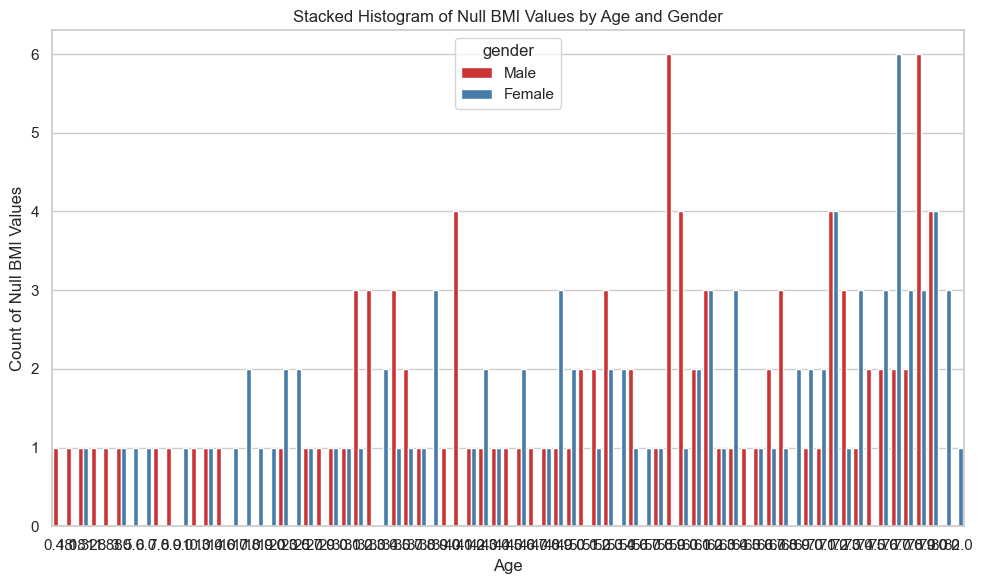

In [52]:
# Select rows with null values in the 'bmi' column
null_bmi_rows = df[df['bmi'].isnull()]

# Group the null rows by 'age', 'gender', and count the occurrences
null_bmi_grouped = null_bmi_rows.groupby(['age', 'gender']).size().reset_index(name='null_count')

# Create a stacked histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='null_count', hue='gender', data=null_bmi_grouped, palette='Set1')
plt.xlabel('Age')
plt.ylabel('Count of Null BMI Values')
plt.title('Stacked Histogram of Null BMI Values by Age and Gender')

plt.tight_layout()
plt.show()

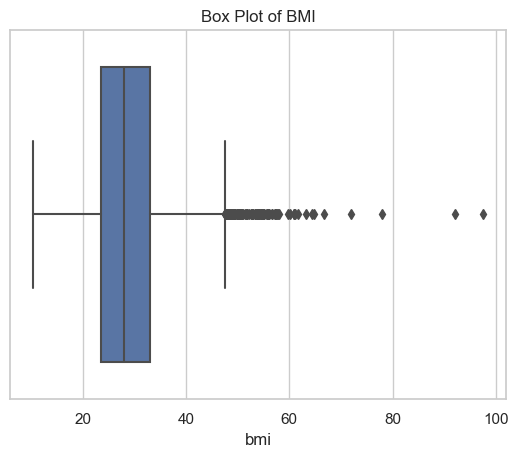

In [53]:
#Checking on BMI outliers

sns.boxplot(x=df['bmi'])
plt.title('Box Plot of BMI')
plt.show()

In [54]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)

outlier_indices = df.index[outliers]
outlier_values = df['bmi'][outliers]

print("Outlier Indices:", outlier_indices)
print("Outlier Values:", outlier_values)


Outlier Indices: Index([  21,  113,  254,  258,  270,  333,  341,  358,  430,  462,
       ...
       4650, 4704, 4779, 4838, 4847, 4858, 4906, 4952, 5009, 5057],
      dtype='int64', length=110)
Outlier Values: 21      48.9
113     56.6
254     50.1
258     54.6
270     60.9
        ... 
4858    47.6
4906    54.1
4952    56.6
5009    49.5
5057    47.6
Name: bmi, Length: 110, dtype: float64


From above, we found the BMI missing values (4% of dataset) are evenly distributed but there's 110 outliers. With this, missing values of BMI will be filled using the median BMI value of similar age and gender categories in the next step - data cleaning. Mean is not used as it is sensitive to outliers and may give less accurate imputation.


In [50]:
#Checking on smoking status data. 

smoking_counts = df['smoking_status'].value_counts()
smoking_counts

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

The 'Unknown' value of smoking status amounted to 30% of dataset. 30% of dataset is too significant to be dropped, hence further data processing will be carried out to retain as much usable data for analysis. 

As there's no major issue found with other attributes in the dataset, we will move on to data cleaning, processing and carry out further EDA after balancing the dataset to get a more accurate insights before training the machine learning model. 

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots for each feature against diagnosis
features = df.columns[1:]
num_features = len(features)

# Determine the number of rows and columns for subplots,ensure no empty plots by allowing dynamics adjustment based on #features
num_rows = (num_features - 1) // 3 + 1
num_cols = min(num_features, 3)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(x='stroke', y=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs stroke')
    axes[row, col].set_ylabel(feature)
    axes[row, col].set_xlabel('Had Stroke (0 = No, 1 = Yes')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

# Part 2. Data Cleaning

Here, we will handle missing values, outliers, and other data quality issues. This step ensures the dataset is ready for further processing.

In [18]:
## Column 'id' is dropped because its existence does not make much difference in model building

df.drop(columns="id",inplace=True)

In [117]:
###DO NOT RUN
## Group the data by 'age' and 'gender', and calculate the mean 'bmi' for each group
grouped_median_bmi = df.groupby(['age', 'gender'])['bmi'].median()

# Define a function to fill NaN values in 'bmi' using the mean of the corresponding group
def fill_bmi(row):
    if pd.isnull(row['bmi']):
        return grouped_median_bmi.loc[row['age'], row['gender']]
    else:
        return row['bmi']

# Apply the function to fill NaN values in the 'bmi' column
df['bmi'] = df.apply(fill_bmi, axis=1)

grouped_median_bmi

'''
output: 
age    gender
0.08   Female    14.10
       Male      16.90
0.16   Male      13.90
0.24   Male      18.50
0.32   Female    16.20
                 ...  
80.00  Male      29.45
81.00  Female    27.75
       Male      27.35
82.00  Female    27.00
       Male      27.50
Name: bmi, Length: 206, dtype: float64
'''

age    gender
0.08   Female    14.10
       Male      16.90
0.16   Male      13.90
0.24   Male      18.50
0.32   Female    16.20
                 ...  
80.00  Male      29.45
81.00  Female    27.75
       Male      27.35
82.00  Female    27.00
       Male      27.50
Name: bmi, Length: 206, dtype: float64

The initial NaN BMI is only 201. But now increased to 206 NaN. This indicates that there are some age and gender combinations where there are no available BMI values, causing the median to be NaN. When applying these NaN median values to fill in the missing BMI values using the apply function, it can introduce additional NaN values. To solve, we will be filling the missing BMI values using the median BMI of the overall dataset, rather than the median of age and gender groups. 

In [19]:
# Calculate the median BMI of the overall dataset
overall_median_bmi = df['bmi'].median()

# Define a function to fill NaN values in 'bmi' using the overall median
def fill_bmi(row):
    if pd.isnull(row['bmi']):
        return overall_median_bmi
    else:
        return row['bmi']

# Apply the function to fill NaN values in the 'bmi' column
df['bmi'] = df.apply(fill_bmi, axis=1)
overall_median_bmi

28.1

# Part 3. Feature Engineering and Transformation

This step involves selecting relevant features, encoding categorical variables, and transforming data as needed. This step ensures the data is in a suitable format for the machine learning algorithms usage.

Theoretically, never smoke would have the least risk of getting stroke, while formerly smoke have less chance of getting stroke compare to an active smoker. The chemicals in tobacco smoke can damage blood vessels, increase the formation of blood clots, and contribute to atherosclerosis (narrowing and hardening of arteries), all of which significantly raise the risk of getting a disruption of blood flow to the brain leading to stroke. Hence, for smoking status, data will be split between smoking_known and smoking_unknown, allowing ordinal encoding for the prior and one-hot encode for the latter. 

In [20]:
# Create a new column "smoking_known" 
smoking_mapping = {
    'Unknown': 0,
    'never smoked': 1,
    'formerly smoked': 2,
    'smokes': 3}

df['smoking_known'] = df['smoking_status'].map(smoking_mapping)

# Create a new column "smoking_unknown" to indicate rows with 'unknown' smoking status
df['smoking_unknown'] = df['smoking_status'].apply(lambda x: 1 if x == 'Unknown' else 0)

# Drop the original "smoking_status" column
df.drop(columns=['smoking_status'], inplace=True)

In [7]:
#Alt. method converting categorical to numerical value for analysis(label encoding)
#Residence_type, Rural=0, Urban=1
#df.replace('No', '0', inplace=True)
#df.replace('Yes', '1', inplace=True)

#from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
#label_encoder = LabelEncoder()

# Assuming 'Residence_type' is a categorical column in the DataFrame
#encoded_residence = label_encoder.fit_transform(df['Residence_type'])

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,smoking_known,smoking_unknown
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,1,2,0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,1,1,0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,1,1,0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,1,3,0
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,0,1,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,0,1,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,0,1,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,0,2,0


**One Hot Encoding for Non Ordinal Categorical data**

In the absence of natural order, we will do One-Hot encoding for nominal data, thus preventing any incorrect interpretations of the coefficients that can be introduced by Ordinal encoding (i.e. relationships or correlations in the data). 

To Note: 

One-Hot Encoding results in a Dummy Variable Trap as the outcome of one variable can easily be predicted with the help of the remaining variables, leading to the problem known as multicollinearity. 

In [21]:
# List of features to one-hot encode
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type']

# Perform one-hot encoding using get_dummies
encoded_df = pd.get_dummies(df, columns=categorical_features, drop_first=False)
'''The drop_first=True parameter drops the first encoded column to avoid multicollinearity. 
However it'll also cause data loss. As the features are of importance, will not drop.
'''
# Convert columns to binary encoding
binary_columns = ['gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No', 'ever_married_Yes', 
                  'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 
                  'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban']

encoded_df[binary_columns] = encoded_df[binary_columns].astype(int)

encoded_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,smoking_known,smoking_unknown,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,67.0,0,1,228.69,36.6,1,2,0,0,1,0,0,1,0,0,1,0,0,0,1
1,61.0,0,0,202.21,28.1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0
3,49.0,0,0,171.23,34.4,1,3,0,1,0,0,0,1,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0


In [ ]:
#Alternative method using sklearn example code

# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder

# List of features to one-hot encode
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)  # Don't set the drop parameter. 
#the usual: encoder = OneHotEncoder(drop='first', sparse=False) drop 1st column to avoid multicollinearity

# Fit and transform the encoder on the categorical features
encoded_features = encoder.fit_transform(df[categorical_features])

# Create a DataFrame from the encoded features and the original numerical features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names(categorical_features))
encoded_df[binary_columns] = df[binary_columns].astype(int)

# Concatenate the binary columns with the encoded features
final_encoded_df = pd.concat([encoded_df, df[binary_columns], df['stroke']], axis=1)

final_encoded_df.head()


One of the common ways to check for multicollinearity is the Variance Inflation Factor (VIF):

VIF=1, Very Less Multicollinearity
VIF<5, Moderate Multicollinearity
VIF>5, Extreme Multicollinearity (This is what we have to avoid)

In [132]:
# Function to calculate VIF

import statsmodels.api as sm

data = encoded_df

def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif']) #Creates an empty DataFrame vif_df with columns named 'Var' and 'Vif' to store the variable names and their corresponding VIF values.
    x_var_names = data.columns #Retrieves the column names of the input DataFrame data and assigns them to the variable x_var_names
    
    for i in range(0, x_var_names.shape[0]): #Initiates a loop that iterates through the range of column indices from 0 to the number of columns in the DataFrame.
        y = data[x_var_names[i]] #Assigns the current column's data to the variable y
        x = data[x_var_names.drop([x_var_names[i]])] #Creates a DataFrame x by excluding the current column from the original DataFrame using the drop method
        model = sm.OLS(y, x).fit()  # Fit the model.This model predicts y based on the values in x based on Linear regression
        r_squared = model.rsquared #Calculates the R-squared value of the fitted linear regression model and assigns it to the variable r_squared.
        vif = round(1 / (1 - r_squared), 2)
        vif_df.loc[i] = [x_var_names[i], vif] #Adds a new row to the vif_df DataFrame with the variable name and its corresponding VIF value.
    return vif_df.sort_values(by='Vif', axis=0, ascending=False, inplace=False) #Returns the vif_df DataFrame, sorted in descending order based on the VIF values. The original DataFrame is not modified (since inplace=False).

# Assuming df contains the dataset
X = encoded_df.drop(['stroke'], axis=1) #Creates a DataFrame X by dropping the 'stroke' column from the original DataFrame
vif_results = calculate_vif(X) #Calls the calculate_vif function on the DataFrame X to calculate VIF values for its features
vif_results


C:\Users\chinf\AppData\Local\Temp\ipykernel_20932\1248541522.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  vif = round(1 / (1 - r_squared), 2)
C:\Users\chinf\AppData\Local\Temp\ipykernel_20932\1248541522.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  vif = round(1 / (1 - r_squared), 2)
C:\Users\chinf\AppData\Local\Temp\ipykernel_20932\1248541522.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  vif = round(1 / (1 - r_squared), 2)
C:\Users\chinf\AppData\Local\Temp\ipykernel_20932\1248541522.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  vif = round(1 / (1 - r_squared), 2)
C:\Users\chinf\AppData\Local\Temp\ipykernel_20932\1248541522.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  vif = round(1 / (1 - r_squared), 2)
C:\Users\chinf\AppData\Local\Temp\ipykernel_20932\1248541522.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  vif = round(1 / (1 - r_squared), 2

,Var,Vif
9,gender_Other,inf
10,ever_married_No,inf
17,Residence_type_Rural,inf
16,work_type_children,inf
15,work_type_Self-employed,inf
14,work_type_Private,inf
13,work_type_Never_worked,inf
12,work_type_Govt_job,inf
11,ever_married_Yes,inf
18,Residence_type_Urban,inf


inf = infinite VIF values. According to VIF, these variables likely be highly correlated with each other. This high correlation is leading to near-perfect linear relationships, causing the VIF calculation to fail. As a result, the VIF values are not reliable for assessing multicollinearity in this case.

In [ ]:
#To overcome the problem of multicollinearity, one of the dummy variables can be dropped.
df = df.drop(df.columns[[0]], axis=1)
calculate_vif(df)

In [28]:
encoded_df.to_csv('encoded_dataset-stroke-data.csv', index=False)

In [27]:
#Ensure data only consist of usable features and are in numerical form

encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      5110 non-null   float64
 1   hypertension             5110 non-null   int64  
 2   heart_disease            5110 non-null   int64  
 3   avg_glucose_level        5110 non-null   float64
 4   bmi                      5110 non-null   float64
 5   stroke                   5110 non-null   int64  
 6   smoking_known            5110 non-null   int64  
 7   smoking_unknown          5110 non-null   int64  
 8   gender_Female            5110 non-null   int32  
 9   gender_Male              5110 non-null   int32  
 10  gender_Other             5110 non-null   int32  
 11  ever_married_No          5110 non-null   int32  
 12  ever_married_Yes         5110 non-null   int32  
 13  work_type_Govt_job       5110 non-null   int32  
 14  work_type_Never_worked  

In [26]:
encoded_df.isnull().sum()

age                        0
hypertension               0
heart_disease              0
avg_glucose_level          0
bmi                        0
stroke                     0
smoking_known              0
smoking_unknown            0
gender_Female              0
gender_Male                0
gender_Other               0
ever_married_No            0
ever_married_Yes           0
work_type_Govt_job         0
work_type_Never_worked     0
work_type_Private          0
work_type_Self-employed    0
work_type_children         0
Residence_type_Rural       0
Residence_type_Urban       0
dtype: int64

In [ ]:
##count unique values of a feature
#unique_values = df['work_type'].unique()

##Drop rows containing 'Other' in the 'gender' column
#df[df['gender'] != 'Other']

# Replace "unknown" values with NaN in the 'smoking_status' column
#df['smoking_status'].replace('Unknown', pd.NA, inplace=True)

##converting categorical to numerical value for analysis
#ever_married, No=0, Yes=1
#df.replace('No', '0', inplace=True)
#df.replace('Yes', '1', inplace=True)

# Drop rows with NaN values in 'smoking' and 'bmi' columns
#df = df.dropna(subset=['smoking_status', 'bmi'])

# Drop 'id' and age_category' columns
#columns_to_drop = ['id', 'age_category']
#df = df.drop(columns=columns_to_drop)
#df = df.drop(columns='id')

# Part 4.1 Balancing the Dataset

Due to the dataset exhibits class imbalance (one class has significantly more instances than the other), balancing is needed to prevent the model from being biased toward the majority class. This can be achieved through techniques like undersampling, oversampling, or using class weights. In this case, we will be using class weights. Depending on the method used in balancing, usually encoding is done after balancing with the exception when applying class weighting. 

In [4]:
encoded_df = pd.read_csv("encoded_dataset-stroke-data.csv")
encoded_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,smoking_known,smoking_unknown,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,67.0,0,1,228.69,36.6,1,2,0,0,1,0,0,1,0,0,1,0,0,0,1
1,61.0,0,0,202.21,28.1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0
3,49.0,0,0,171.23,34.4,1,3,0,1,0,0,0,1,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1
5106,81.0,0,0,125.20,40.0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1
5107,35.0,0,0,82.99,30.6,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0
5108,51.0,0,0,166.29,25.6,0,2,0,0,1,0,0,1,0,0,1,0,0,1,0


In [5]:
# define the target variable (dependent variable) as y
y = encoded_df['stroke']

# Take all columns except target as predictor columns
predictor_columns = [c for c in encoded_df.columns if c != 'stroke']

''' Alt. code for same results: 
predictor_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 
                     'smoking_known', 'smoking_unknown', 'gender_Female', 'gender_Male', 'gender_Other', 
                     'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked', 
                     'work_type_Private', 'work_type_Self-employed', 'work_type_children', 
                     'Residence_type_Rural', 'Residence_type_Urban']

# List of attributes except 'stroke'
#predictor_columns = encoded_df.columns.difference(['stroke']).tolist()

'''

# Load the dataset as a pandas data frame
X = pd.DataFrame(encoded_df, columns = predictor_columns)
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_known,smoking_unknown,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,67.0,0,1,228.69,36.6,2,0,0,1,0,0,1,0,0,1,0,0,0,1
1,61.0,0,0,202.21,28.1,1,0,1,0,0,0,1,0,0,0,1,0,1,0
2,80.0,0,1,105.92,32.5,1,0,0,1,0,0,1,0,0,1,0,0,1,0
3,49.0,0,0,171.23,34.4,3,0,1,0,0,0,1,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,1,0,1,0,0,0,1,0,0,1,0,0,0,1
5106,81.0,0,0,125.20,40.0,1,0,1,0,0,0,1,0,0,0,1,0,0,1
5107,35.0,0,0,82.99,30.6,1,0,1,0,0,0,1,0,0,0,1,0,1,0
5108,51.0,0,0,166.29,25.6,2,0,0,1,0,0,1,0,0,1,0,0,1,0


In [6]:
#Using class weighting method by assigning different weights to the classes in the algorithm's loss function. 
#This approach doesn't modify the dataset and allows the algorithm to learn from both classes.
#By setting class weights, model give more importance to the minority class during training.

#splitting to train and test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your feature and target arrays
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate the class weights
class_0_count = (y_train == 0).sum()
class_1_count = (y_train == 1).sum()
total_samples = class_0_count + class_1_count

class_0_weight = total_samples / (2 * class_0_count)
class_1_weight = total_samples / (2 * class_1_count)

class_weights = {0: class_0_weight, 1: class_1_weight}

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the classifier with class weights
classifier = LogisticRegression(class_weight=class_weights, max_iter=1000)
classifier.fit(X_train_scaled, y_train)

# Evaluate the classifier on the test data
accuracy = classifier.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

# Create a DataFrame with balanced dataset using the original unscaled X_train
balanced_df = pd.DataFrame(X_train, columns=predictor_columns)
balanced_df['stroke'] = y_train

# Save the balanced dataset to a CSV file
balanced_df.to_csv('balanced_dataset-stroke-data.csv', index=False)

Accuracy: 0.7504892367906066


In [7]:
print("Original shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print()

# Perform scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shapes after scaling:")
print("X_train_scaled:", X_train_scaled.shape)
print("X_test_scaled:", X_test_scaled.shape)


Original shapes:
X_train: (4088, 19)
X_test: (1022, 19)

Shapes after scaling:
X_train_scaled: (4088, 19)
X_test_scaled: (1022, 19)


In [147]:
##if issue persist after scaling: 

#i.e. lbfgs solver used by LogisticRegression failed to converge within the specified number of iterations.

#To solve: Experiment with different solvers 
#classifier = LogisticRegression(class_weight=class_weights, max_iter=1000, solver='newton-cg')
#Available solver options include 'newton-cg', 'lbfgs', 'liblinear', 'sag', and 'saga'. 

In [9]:
df_bal = pd.read_csv('balanced_dataset-stroke-data.csv')
df_bal

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_known,smoking_unknown,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,stroke
0,79.00,0,0,112.64,28.5,2,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,62.00,0,0,88.32,36.3,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0
2,21.00,0,0,59.52,33.7,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0
3,31.00,0,0,65.70,30.4,2,0,0,1,0,0,1,1,0,0,0,0,0,1,0
4,31.00,0,0,59.63,19.9,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,43.00,0,0,88.00,30.6,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0
4084,61.00,1,0,170.05,60.2,3,0,1,0,0,0,1,0,0,1,0,0,1,0,0
4085,1.16,0,0,97.28,17.8,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0
4086,80.00,0,0,196.08,31.0,2,0,0,1,0,0,1,0,0,0,1,0,1,0,0


# Part 5.1 Machine Learning Model Training

In [10]:
#perform hyperparameter tuning for the class weights using GridSearchCV. The grid search will train and evaluate the 
#classifier using cross-validation for each configuration and select the one with the best performance.

from sklearn.model_selection import train_test_split, GridSearchCV

# Create a logistic regression classifier
classifier = LogisticRegression()

# Define a grid of class weights to search over
class_weight_grid = [
    {0: 1, 1: 1},                 # Equal weights (no class weighting)
    {0: 1, 1: 10},                # Higher weight for class 1
    {0: 1, 1: 20},                # Higher weight for class 1
    # Add more class weight configurations as needed
]

# Perform grid search with cross-validation
param_grid = {'class_weight': class_weight_grid}
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print the best class weights and corresponding accuracy
best_class_weights = grid_search.best_params_['class_weight']
best_accuracy = grid_search.best_score_
print("Best Class Weights:", best_class_weights)
print("Best Accuracy:", best_accuracy)


Best Class Weights: {0: 1, 1: 1}
Best Accuracy: 0.9542565830622498


In [15]:
#implementing best class weights in the classification method

# Split the data and scale features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a grid of class weights to search over
class_weight_grid = [
    {0: 1, 1: 1},                 # Equal weights (no class weighting)
    {0: 1, 1: 50},                # Higher weight for class 1
    {0: 1, 1: 90},                # Higher weight for class 1, # Add more class weight configurations as needed
]

# Create a logistic regression classifier
classifier = LogisticRegression()

# Perform grid search with cross-validation
param_grid = {'class_weight': class_weight_grid}
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best class weights from the grid search
best_class_weights = grid_search.best_params_['class_weight']

# Create and train the classifier with best class weights
best_classifier = LogisticRegression(class_weight=best_class_weights)
best_classifier.fit(X_train_scaled, y_train)

# Evaluate the best classifier on the test data
accuracy = best_classifier.score(X_test_scaled, y_test)
print("Best Class Weights:", best_class_weights)
print("Best Classifier Accuracy:", accuracy)


Best Class Weights: {0: 1, 1: 1}
Best Classifier Accuracy: 0.9393346379647749


In [16]:
from sklearn.metrics import confusion_matrix, classification_report

#Use Logistic Regression Model 

# Build Model
model = LogisticRegression (random_state = 1, max_iter = 1000)
# Fit Model
model.fit(X_train_scaled , y_train.ravel())

# Score
model.score(X_test_scaled, y_test)
print ('Accuracy score :', model.score(X_test_scaled, y_test))

# Predict class labels (not probabilities)
y_pred = model.predict(X_test_scaled)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Model Confusion Matrix (Logistic Regression)')
print(conf_matrix)

# Print the classification report
print('Model Classification Report (Logistic Regression)')
print(classification_report(y_test, y_pred))

Accuracy score : 0.9393346379647749
Model Confusion Matrix (Logistic Regression)
[[960   0]
 [ 62   0]]
Model Classification Report (Logistic Regression)
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



C:\Users\chinf\anaconda3\envs\mlusu\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chinf\anaconda3\envs\mlusu\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chinf\anaconda3\envs\mlusu\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From above, we found that the model has an accuracy of approximately 93.9%, which means it correctly predicted 93.9% of instances. 

From Confusion Matrix, we see the followings:

True Negatives (TN): 960 instances were correctly predicted as no stroke (class 0).
False Negatives (FN): 62 instances were wrongly predicted as no stroke when they were actually stroke cases (class 1).
There are no instances predicted as stroke (class 1) in the confusion matrix.

From Classification Report:

For class 0 (no stroke): The model has a high precision (94%), correctly identifying all instances of class 0. Recall is also high (1.00), indicating that the model effectively identified all class 0 instances. The F1-score (a balance between precision and recall) is also high at 0.97.

For class 1 (stroke): The accuracy score, precision, recall, and F1-score for class 1 are all low in the classification report. This indicates that the model is not effectively identifying instances of class 1.

The "macro avg" and "weighted avg" rows provide overall averages of these metrics across both classes. In this model, the "macro avg" values show that the precision, recall, and F1-score are around 0.48, indicating a relatively balanced summary performance across the two classes, even though there are no predictions for class 1. The "weighted avg" values provide a more meaningful average that considers the class distribution. Since class 0 (no stroke) has many more instances, the weighted average is skewed more towards the performance on that class.

In short, the model is performing well in predicting class 0 (no stroke), but it's not predicting any instances as class 1 (stroke). It seems that even after applying class weights and hyperparameter tuning, the performance on class 1 (stroke) is still poor. This might be due to the severe class imbalance in the dataset. Only 4% of the data belongs to class 1, making it difficult for the model to learn patterns effectively.

The severity of the class imbalance might require more advanced techniques like resampling, exploring different algorithms, and carefully considering evaluation metrics that are suitable for imbalanced datasets.

# Part 6.1 Model Evaluation and Fine-Tuning

In [17]:
#Use Support Vector Machine to evaluate model

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(kernel='linear', gamma = 'auto'))
clf.fit(X_train_scaled, y_train)

print('Accuracy:', clf.score(X_test, y_test))
y_pred = clf.predict(X_test_scaled)

print('Default Confusion Matrix')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

print('Model Confusion Matrix(SVM)')
print(confusion_matrix(y_test, y_pred))

print('Model Classification Report(SVM)')
print(classification_report(y_test, y_pred))

Accuracy: 0.9393346379647749
Default Confusion Matrix
[['TN' 'FP']
 ['FN' 'TP']]
Model Confusion Matrix(SVM)
[[960   0]
 [ 62   0]]
Model Classification Report(SVM)
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



C:\Users\chinf\anaconda3\envs\mlusu\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chinf\anaconda3\envs\mlusu\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chinf\anaconda3\envs\mlusu\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


It appears that the Support Vector Machine (SVM) model trained achieved similar results to the logistic regression model in terms of accuracy, confusion matrix, and classification report. Specifically, both models are struggling to predict class 1 (stroke) instances correctly, resulting in low precision, recall, and F1-score for class 1.

We could explore ensemble methods like Random Forest, Gradient Boosting, or XGBoost, which can handle class imbalances better if resampling (undersampling the majority class (class 0)) does not work. 

# Part 4.2 Balancing the Dataset
using Undersampling method

The simplest technique to implement for imbalance data might be Resampling, especially undersampling the majority class if it is significantly larger. This can be done using the RandomUnderSampler from the imbalanced-learn library.

As balancing using class weightage is proven to be unsuccessful in predicting positive stroke cases, we will attempt the undersampling method despite it'll result to 90% data loss.

In [2]:
encoded_df = pd.read_csv("encoded_dataset-stroke-data.csv")
encoded_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,smoking_known,smoking_unknown,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,67.0,0,1,228.69,36.6,1,2,0,0,1,0,0,1,0,0,1,0,0,0,1
1,61.0,0,0,202.21,28.1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0
3,49.0,0,0,171.23,34.4,1,3,0,1,0,0,0,1,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1
5106,81.0,0,0,125.20,40.0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1
5107,35.0,0,0,82.99,30.6,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0
5108,51.0,0,0,166.29,25.6,0,2,0,0,1,0,0,1,0,0,1,0,0,1,0


In [7]:
from imblearn.under_sampling import RandomUnderSampler

# define the target variable (dependent variable) as y
y = encoded_df['stroke']

# Take all columns except target as predictor columns
predictor_columns = [c for c in encoded_df.columns if c != 'stroke']

# Load the dataset as a pandas data frame
X = pd.DataFrame(encoded_df, columns = predictor_columns)

# Assuming X and y are the feature and target arrays
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X, y)

In [13]:
# Assuming X_resampled and y_resampled are the resampled feature and target arrays
stroke_undersample = pd.DataFrame(X_resampled, columns=predictor_columns)
stroke_undersample['stroke'] = y_resampled

# Save the under-sampled DataFrame as a CSV file
stroke_undersample.to_csv('stroke_undersample.csv', index=False)

# EDA with balanced dataset for insights

In [8]:
df = pd.read_csv('stroke_undersample.csv')
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_known,smoking_unknown,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,stroke
0,44.0,0,0,80.75,30.9,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
1,75.0,1,0,219.82,29.5,2,0,1,0,0,0,1,0,0,0,1,0,1,0,0
2,56.0,0,0,94.19,25.7,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,5.0,0,0,122.25,16.7,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0
4,69.0,0,0,110.96,25.9,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,57.0,0,0,84.96,36.7,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1
494,14.0,0,0,57.93,30.9,0,1,1,0,0,1,0,0,0,0,0,1,1,0,1
495,75.0,0,0,78.80,29.3,2,0,1,0,0,0,1,0,0,0,1,0,1,0,1
496,71.0,1,0,87.80,28.1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1


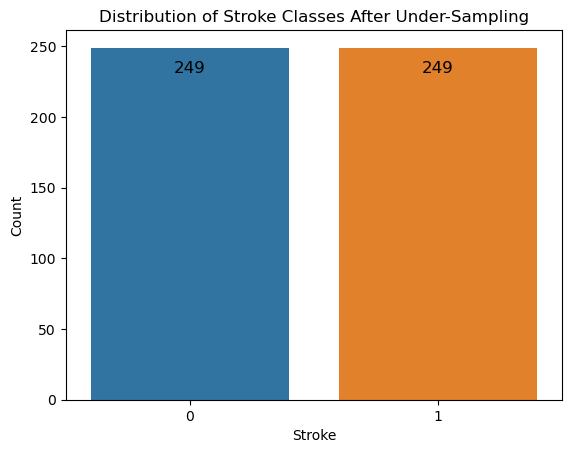

In [16]:
# Create the count plot using the under-sampled DataFrame
ax = sns.countplot(x='stroke', data=df)

# Calculate value counts for both classes
value_counts = df['stroke'].value_counts()

# Add value counts as text labels on the bars
for i, v in enumerate(value_counts):
    ax.text(i, v + (-20), str(v), ha='center', va='bottom', fontsize=12)

# Add title and labels
ax.set_title('Distribution of Stroke Classes After Under-Sampling')
ax.set_xlabel('Stroke')
ax.set_ylabel('Count')

# Add legend
#ax.legend(title='Class', labels=['No Stroke (0)', 'Stroke (1)'])

# Show the plot
plt.show()

<Axes: >

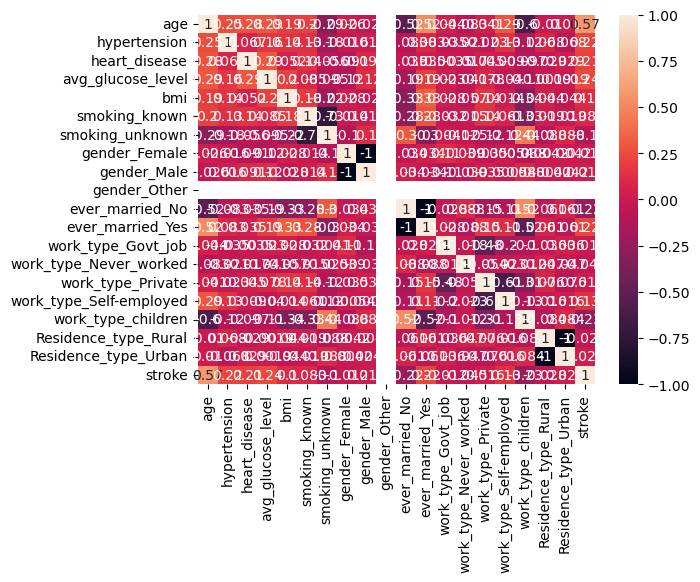

In [37]:
sns.heatmap(df.corr(),annot = True)

In [38]:
df.corr()['stroke'].sort_values()

work_type_children        -0.229293
ever_married_No           -0.218930
smoking_unknown           -0.100062
work_type_Never_worked    -0.044856
Residence_type_Rural      -0.028157
gender_Female             -0.012176
work_type_Govt_job        -0.011696
gender_Male                0.012176
work_type_Private          0.016333
Residence_type_Urban       0.028157
smoking_known              0.083128
bmi                        0.103555
work_type_Self-employed    0.133859
heart_disease              0.209733
ever_married_Yes           0.218930
hypertension               0.219179
avg_glucose_level          0.237278
age                        0.571430
stroke                     1.000000
gender_Other                    NaN
Name: stroke, dtype: float64

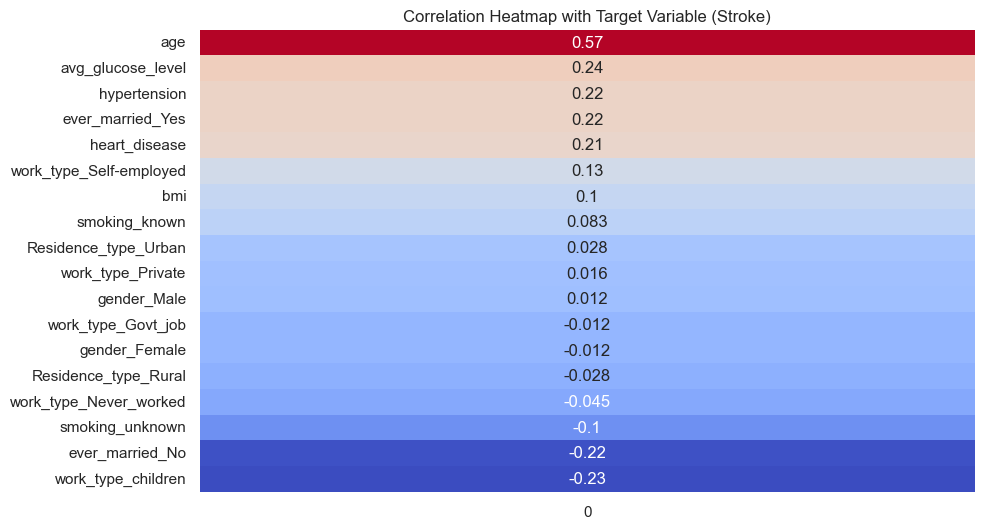

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the features and target variable
features = df.drop(columns=['stroke', 'gender_Other'])
target = df['stroke']

# Calculate the correlations
correlations = features.corrwith(target)

# Sort the correlations in descending order
sorted_correlations = correlations.sort_values(ascending=False)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sorted_correlations.to_frame(), annot=True, cmap="coolwarm", cbar=False)
plt.title("Correlation Heatmap with Target Variable (Stroke)")
plt.show()

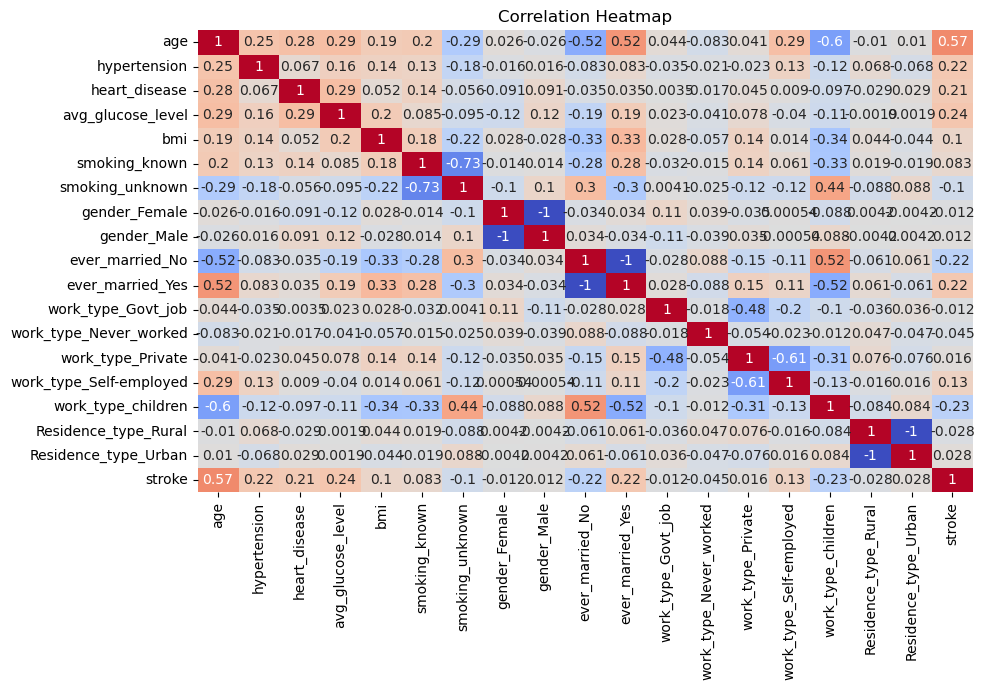

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the 'gender_Other' column
df = df.drop(columns=['gender_Other'])

# Calculate the correlations
correlations = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True, cmap="coolwarm", cbar=False)
plt.title("Correlation Heatmap")
plt.show()

From above, stroke have higher correlation with heart disease, hypertension, being married, of an older age and higher average glucose level. Let's view it in boxplot. 

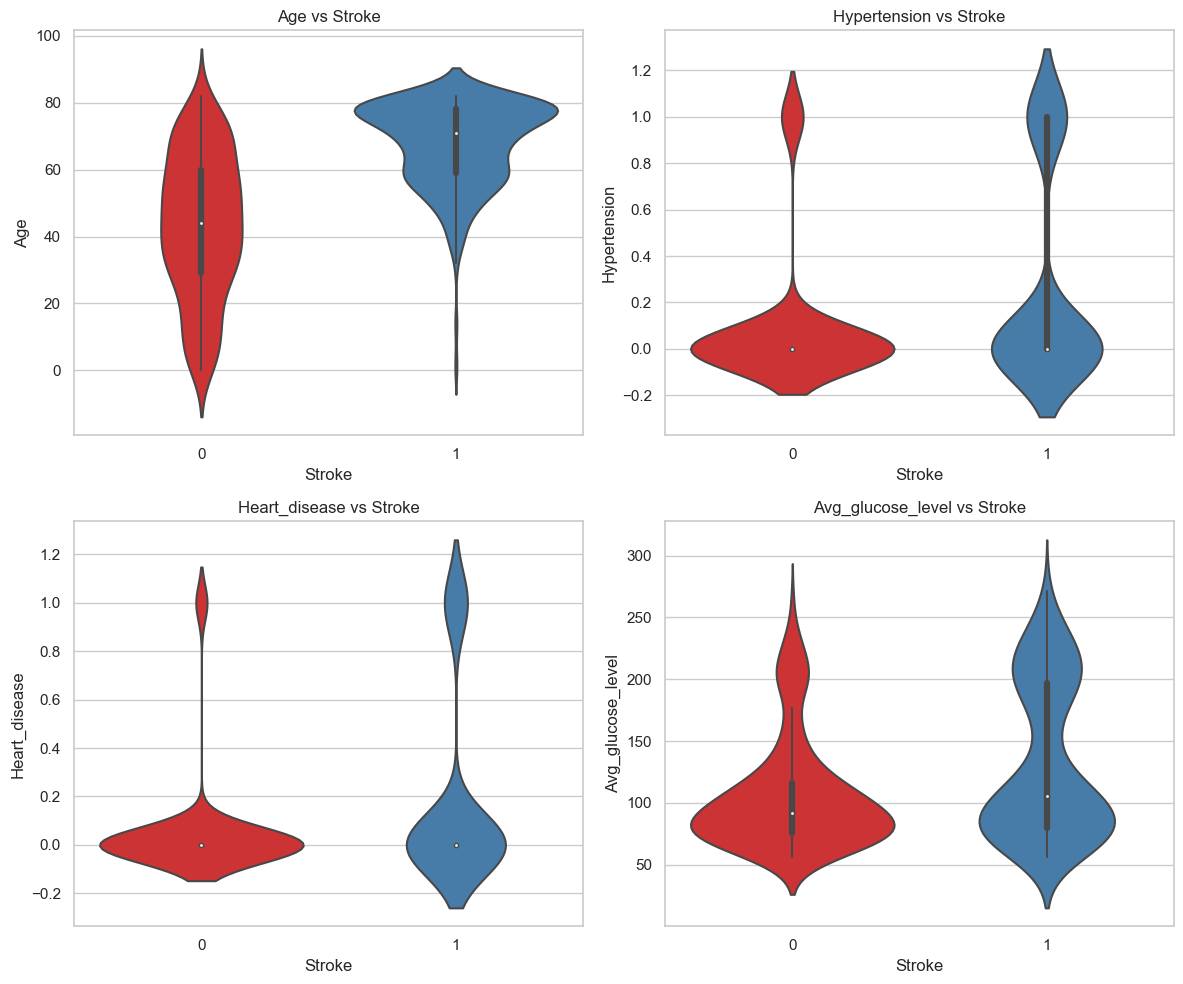

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the style
sns.set(style="whitegrid")

# Define the features for plotting
features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'ever_married_Yes', 'bmi']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Loop through each feature and create a violin plot
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    sns.violinplot(x='stroke', y=feature, data=df, ax=axes[row, col], palette='Set1')
    axes[row, col].set_title(f'{feature.capitalize()} vs Stroke')
    axes[row, col].set_xlabel('Stroke')
    axes[row, col].set_ylabel(feature.capitalize())

plt.tight_layout()
plt.show()


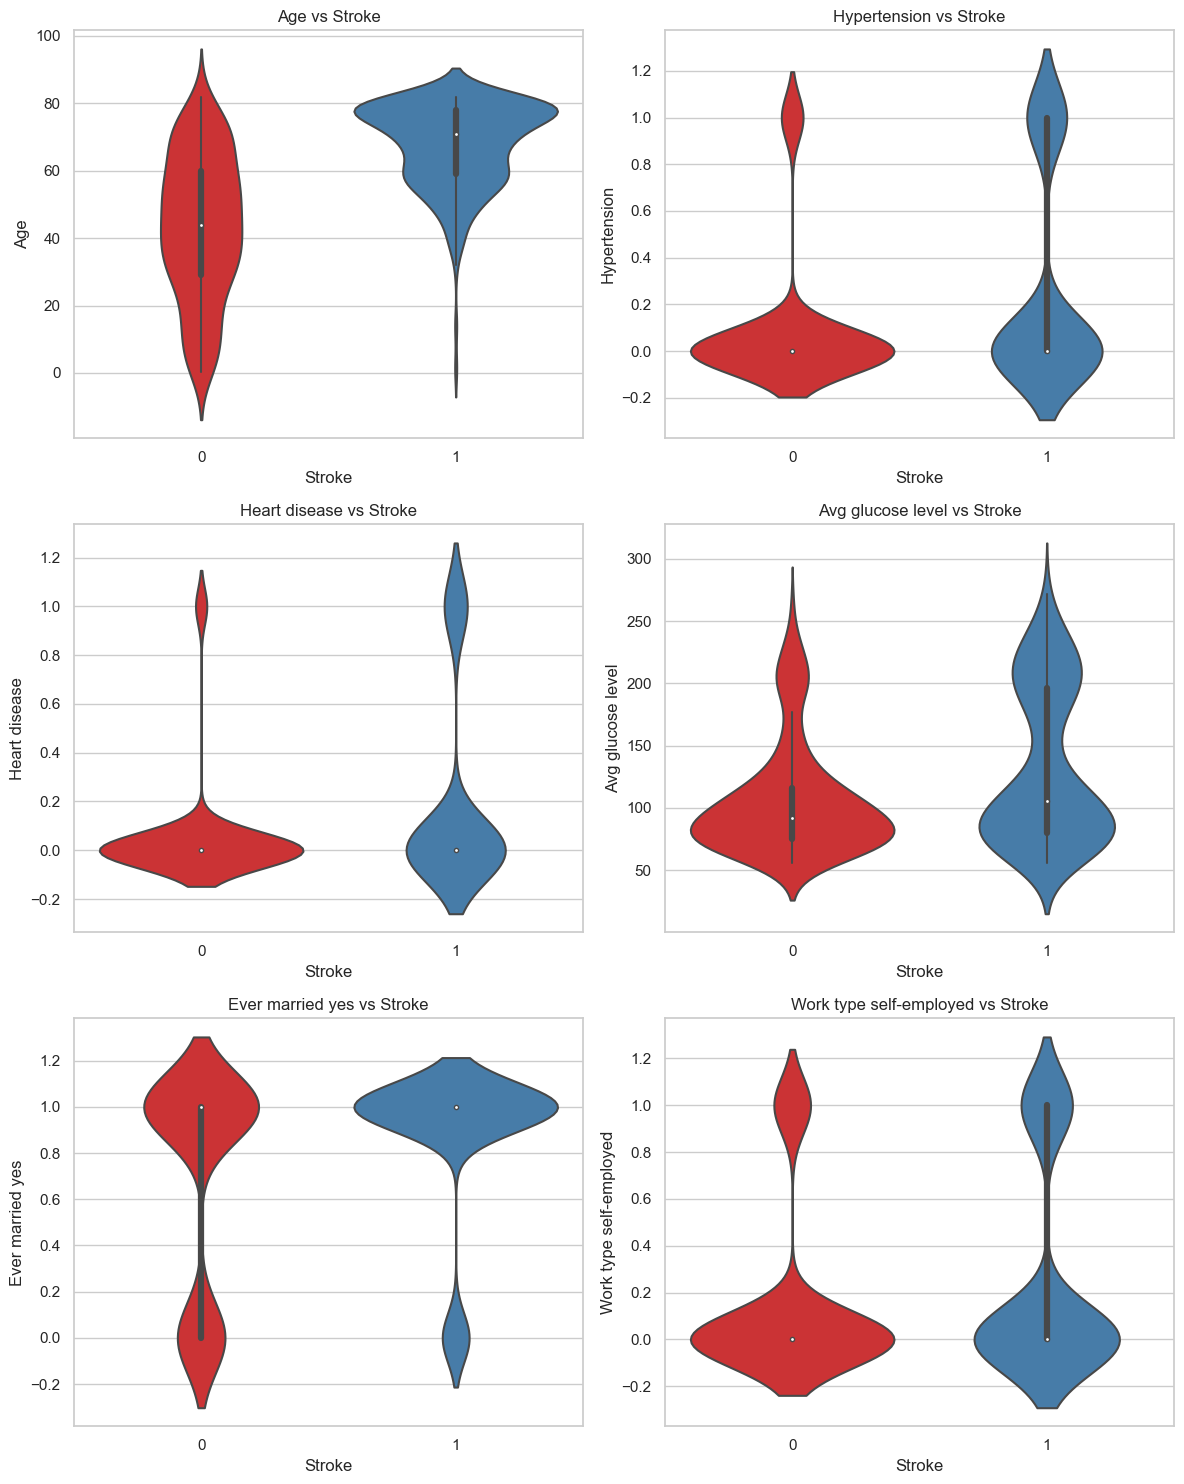

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the style
sns.set(style="whitegrid")

# Define the features for plotting
features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'ever_married_Yes', 'work_type_Self-employed']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))

# Loop through each feature and create a violin plot
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    sns.violinplot(x='stroke', y=feature, data=df, ax=axes[row, col], palette='Set1')
    axes[row, col].set_title(f'{feature.replace("_", " ").capitalize()} vs Stroke')
    axes[row, col].set_xlabel('Stroke')
    axes[row, col].set_ylabel(feature.replace("_", " ").capitalize())

plt.tight_layout()
plt.show()


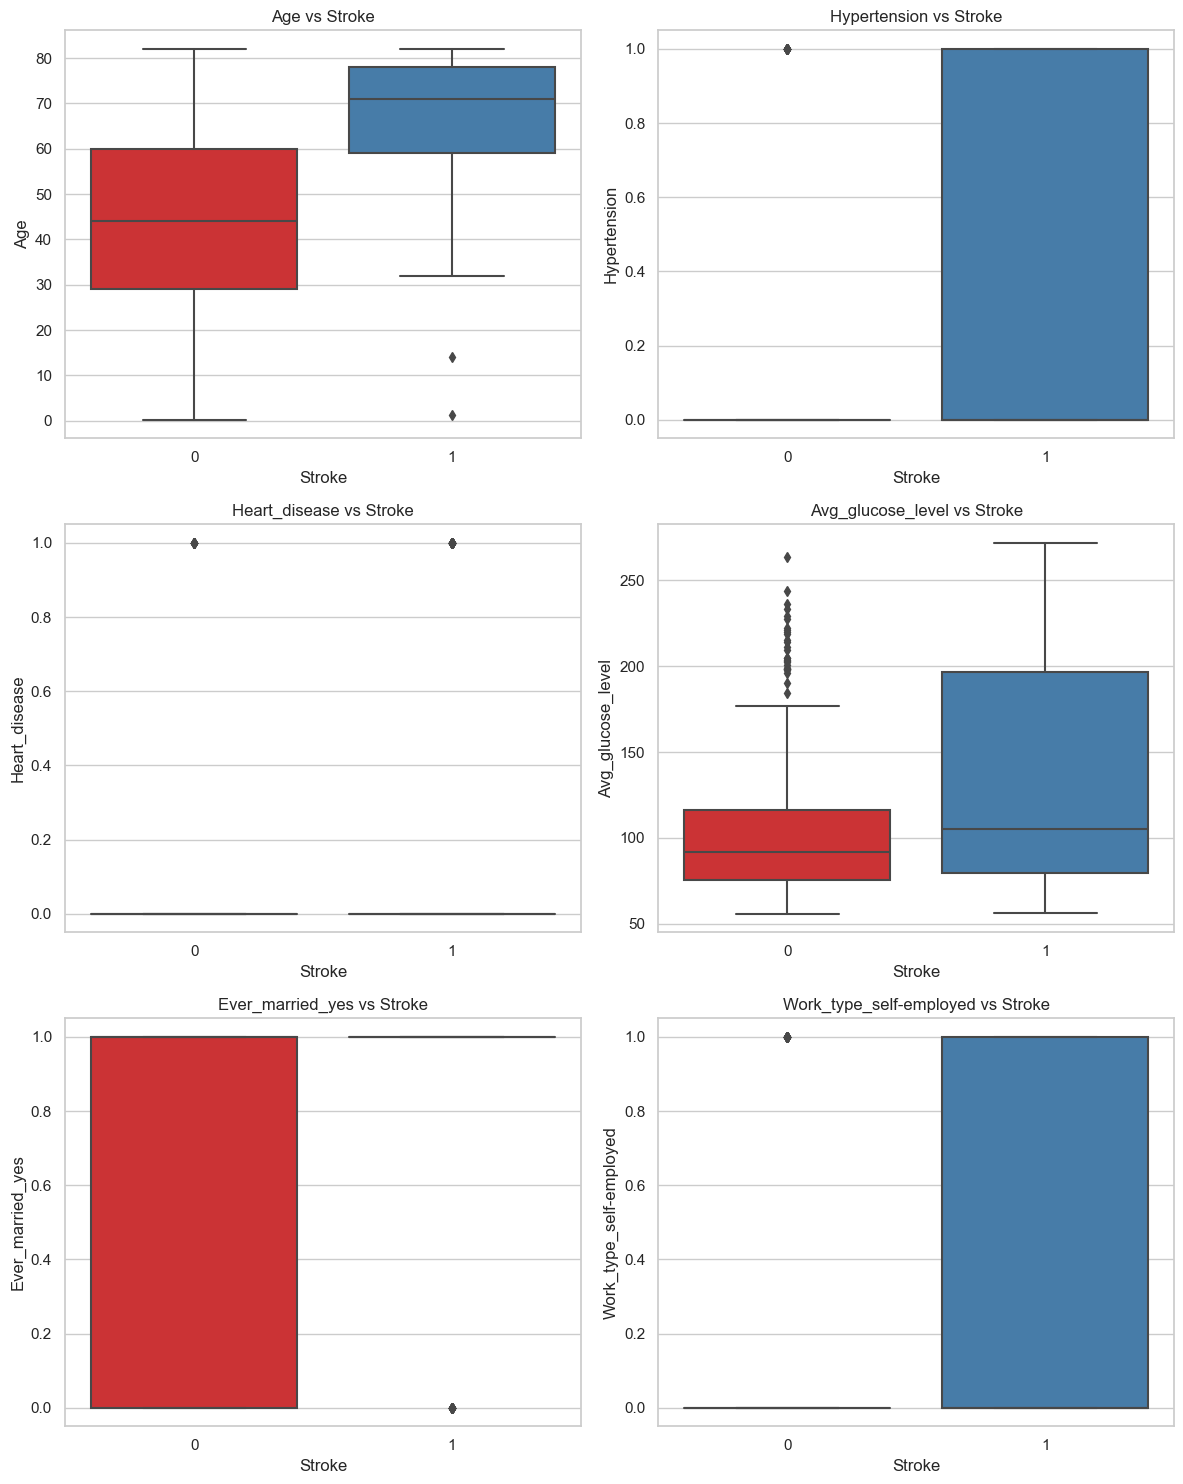

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the style
sns.set(style="whitegrid")

# Define the features for plotting
features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'ever_married_Yes', 'work_type_Self-employed']

# Calculate the number of rows and columns for the subplots
num_features = len(features)
num_cols = 2
num_rows = (num_features + 1) // num_cols  # Adding 1 to ensure all features are covered

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 5 * num_rows))

# Loop through each feature and create a box plot
for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(x='stroke', y=feature, data=df, ax=axes[row, col], palette='Set1')
    axes[row, col].set_title(f'{feature.capitalize()} vs Stroke')
    axes[row, col].set_xlabel('Stroke')
    axes[row, col].set_ylabel(feature.capitalize())

plt.tight_layout()
plt.show()


Comparing a violin plot vs boxplot, violin plot give a better visualisation of stroke vs age, hypertension, heart disease and average glucose level. 

# Part 5.2 Machine Learning Model Training 

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# define the target variable (dependent variable) as y
y = df['stroke']

# Take all columns except target as predictor columns
predictor_columns = [c for c in df.columns if c != 'stroke']

# Load the dataset as a pandas data frame
X = pd.DataFrame(df, columns = predictor_columns)

#create training and testing subsets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state = 1)

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Build Model
model = LogisticRegression (random_state = 1, max_iter = 1000)

# Fit Model
model.fit(X_train , y_train)
#model.fit(X_train_scaled , y_train)
#model.fit(X_train_scaled , y_train.ravel())

# Score
model.score(X_test, y_test)
print ('Accuracy score :', model.score(X_test, y_test))

# Predict class labels (not probabilities)
y_pred = model.predict(X_test)

# Calculate and print the confusion matrix
print('Logistic Regression')
print('Model Confusion Matrix (Logistic Regression)')
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print('Model Classification Report (Logistic Regression)')
print(classification_report(y_test, y_pred))

Accuracy score : 0.74
Logistic Regression
Model Confusion Matrix (Logistic Regression)
[[34 11]
 [15 40]]
Model Classification Report (Logistic Regression)
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        45
           1       0.78      0.73      0.75        55

    accuracy                           0.74       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.74      0.74      0.74       100



In summary, the logistic regression model achieved an accuracy of 74%, with decent precision, recall, and F1-score values for both classes.

Confusion matrix explained:

True Negative (TN): 34 instances were correctly predicted as class 0.
False Positive (FP): 11 instances were incorrectly predicted as class 1 when they were actually class 0.
False Negative (FN): 15 instances were incorrectly predicted as class 0 when they were actually class 1.
True Positive (TP): 40 instances were correctly predicted as class 1.


Classification report explained: 

Precision: Precision is the ratio of correctly predicted positive observations (TP) to the total predicted positives (TP + FP). Precision for class 0 is 0.69, and for class 1 is 0.78.
Recall (Sensitivity or True Positive Rate): Recall is the ratio of correctly predicted positive observations (TP) to the all observations in actual class (TP + FN). Recall for class 0 is 0.76, and for class 1 is 0.73.
F1-score: F1-score is the weighted average of precision and recall. It's a metric that considers both false positives and false negatives. The F1-score for class 0 is 0.72, and for class 1 is 0.75.
Support: The number of actual occurrences of the class in the specified dataset. Support for class 0 is 45, and for class 1 is 55.

In [10]:
#Use Support Vector Machine to evaluate model

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(kernel='linear', gamma = 'auto'))
clf.fit(X_train, y_train)

print('Support Vector Machine')
print('Accuracy:', clf.score(X_test, y_test))
y_pred = clf.predict(X_test)

print('Default Confusion Matrix')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

print('Model Confusion Matrix(SVM)')
print(confusion_matrix(y_test, y_pred))

print('Model Classification Report(SVM)')
print(classification_report(y_test, y_pred))

Support Vector Machine
Accuracy: 0.74
Default Confusion Matrix
[['TN' 'FP']
 ['FN' 'TP']]
Model Confusion Matrix(SVM)
[[32 13]
 [13 42]]
Model Classification Report(SVM)
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        45
           1       0.76      0.76      0.76        55

    accuracy                           0.74       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.74      0.74      0.74       100



# Part 6.2 Model Evaluation and Fine-Tuning

In [11]:
#Use Baive Bayes to evaluate model

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

print('Accuracy:', gnb.score(X_test, y_test))
y_pred = gnb.predict(X_test)

print('Default Confusion Matrix')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

print('Model Confusion Matrix(Gaussian)')
print(confusion_matrix(y_test, y_pred))

print('Model Classification Report(Gaussian)')
print(classification_report(y_test, y_pred))

Accuracy: 0.55
Default Confusion Matrix
[['TN' 'FP']
 ['FN' 'TP']]
Model Confusion Matrix(Gaussian)
[[11 34]
 [11 44]]
Model Classification Report(Gaussian)
              precision    recall  f1-score   support

           0       0.50      0.24      0.33        45
           1       0.56      0.80      0.66        55

    accuracy                           0.55       100
   macro avg       0.53      0.52      0.50       100
weighted avg       0.54      0.55      0.51       100



In [13]:
##Regularisation & Scaling to fine-tune model
from sklearn.model_selection import train_test_split, GridSearchCV
#without scaling -pop up issue, i.e. lbfgs solver used by LogisticRegression failed to converge within the specified number of iterations.
#changing solver from lbfgs to liblinear - supports both 'l1' and 'l2' penalties & carry out features Scaling

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid
lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [1, 10, 100]
}

# Create a logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear')

# Create a GridSearchCV instance with logistic regression and parameter grid
grid_search = GridSearchCV(estimator=logreg, param_grid=lr_params, cv=5, scoring='accuracy')

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'C': 1, 'penalty': 'l2'}
Best Score: 0.7664240506329114


In [23]:
!pip install scikit-learn-pipeline-utils

  Using cached scikit_learn_pipeline_utils-0.0.7-py3-none-any.whl (4.7 kB)


In [14]:
#Find best estimator for SVM

from sklearn.pipeline import Pipeline

steps = [('scaler', StandardScaler()),
         ('SVM', SVC(probability=True))]

svc_params = {
    'SVM__C': [1, 10, 100],
    'SVM__gamma': [0.001, 0.0001],
    'SVM__kernel': ['linear', 'rbf']
}

svc_pipeline = Pipeline(steps)
SVCclf = GridSearchCV(svc_pipeline, svc_params)
SVCclf.fit(X, y)

# Get the best estimator and its corresponding score
best_estimator = SVCclf.best_estimator_
best_score = SVCclf.best_score_

print("Best Estimator:", best_estimator)
print("Best Score:", best_score)


Best Estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('SVM', SVC(C=100, gamma=0.001, probability=True))])
Best Score: 0.7570909090909093


In [15]:
from sklearn.metrics import confusion_matrix, classification_report

# Put in best_estimator from previous code
best_model = best_estimator

print('Support Vector Machine_Scaled')

# Calculate and print the accuracy score
accuracy = best_model.score(X_test, y_test)
print('Accuracy:', accuracy)

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Calculate and print the default confusion matrix
print('Default Confusion Matrix')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

# Calculate and print the model's confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Model Confusion Matrix (SVM_C)')
print(conf_matrix)

# Print the model's classification report
print('Model Classification Report (SVM_C)')
print(classification_report(y_test, y_pred))

Support Vector Machine_Scaled
Accuracy: 0.78
Default Confusion Matrix
[['TN' 'FP']
 ['FN' 'TP']]
Model Confusion Matrix (SVM_C)
[[33 12]
 [10 45]]
Model Classification Report (SVM_C)
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        45
           1       0.79      0.82      0.80        55

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100



In [34]:
import pickle #after model.fit

#saving as pickle model
with open('stroke_model.pkl', 'wb') as file:
    pickle.dump(model, file)

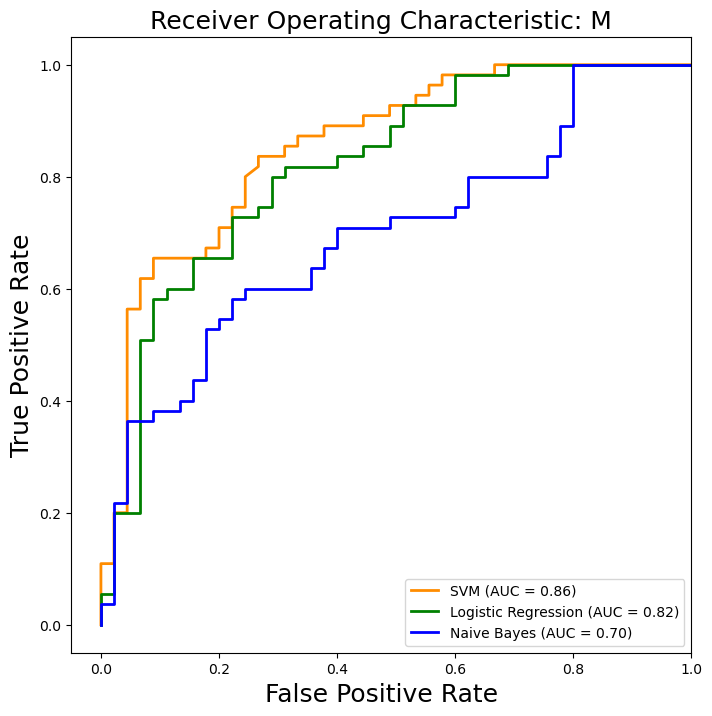

In [33]:
#Best performing model via ROC curve

from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, SVCclf.predict_proba(X_test)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Calculate ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Calculate ROC curve and AUC for Naive Bayes (replace 'nb_model' with the actual Naive Bayes model)
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, gnb.predict_proba(X_test)[:, 1])
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

# Plot ROC curves
plt.figure(figsize=[8, 8])
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)

# Plot SVM ROC curve
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')

# Plot Logistic Regression ROC curve
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

# Plot Naive Bayes ROC curve
plt.plot(fpr_gnb, tpr_gnb, color='blue', lw=2, label=f'Naive Bayes (AUC = {roc_auc_gnb:.2f})')

plt.legend(loc="lower right")
plt.show()

Here, we evaluate the performance of different machine learning models using ROC curves and calculating the AUC (Area Under the ROC Curve) for each model. AUC is a metric that measures the ability of a model to distinguish between positive and negative classes. Higher AUC values generally indicate better performance.

In [35]:
#import pickle

# Load the Model from the Pickle File
with open('stroke_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Make Predictions on the Test Dataset
test_predictions = loaded_model.predict(X_test)

# Use Predictions
print("Predictions for Test Dataset:", test_predictions)

Predictions for Test Dataset: [0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1]


In [40]:
from sklearn.metrics import accuracy_score

# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Make predictions on the testing data
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy scores
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Compare the two accuracy scores
if test_accuracy > train_accuracy:
    print("Testing accuracy is higher than training accuracy.")
elif test_accuracy < train_accuracy:
    print("Training accuracy is higher than testing accuracy.")
else:
    print("Training and testing accuracy are equal.")


Training Accuracy: 0.78
Testing Accuracy: 0.74
Training accuracy is higher than testing accuracy.


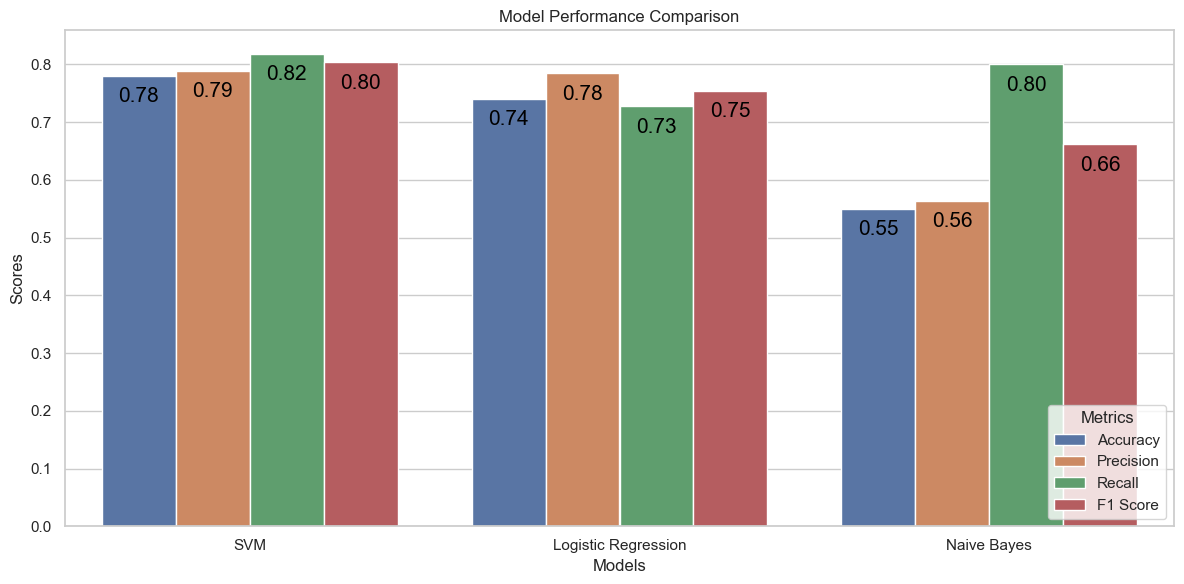

In [28]:
# Model names
models = ['SVM', 'Logistic Regression', 'Naive Bayes']

# Metrics values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [[svm_accuracy, svm_precision, svm_recall, svm_f1],
          [lr_accuracy, lr_precision, lr_recall, lr_f1],
          [nb_accuracy, nb_precision, nb_recall, nb_f1]]

# Create a DataFrame for Seaborn
data = pd.DataFrame(values, columns=metrics)
data['Model'] = models

# Melt the DataFrame for easier plotting
melted_data = pd.melt(data, id_vars=['Model'], value_vars=metrics)

# Set Seaborn style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Model", y="value", hue="variable", data=melted_data)
plt.title('Model Performance Comparison')
plt.ylabel('Scores')
plt.xlabel('Models')

# Move the legend to the bottom right
plt.legend(title='Metrics', bbox_to_anchor=(1, 0), loc='lower right')

# Annotate bars with values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=15, color='black', xytext=(0, -15), textcoords='offset points')

plt.tight_layout()
plt.show()

In [22]:
#%debug

> c:\users\chinf\appdata\local\temp\ipykernel_2520\1873728772.py(76)<module>()

ipdb> ax
*** NameError: name 'ax' is not defined
--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user


This project can be further extended training the model using other algorithms such as Decision Trees, Random Forests, Gradient Boosting and Neural Networks Synthetic Minority. We can also use techniques like Bagging (Bootstrap Aggregating) or Boosting to improve model performance.

A stroke is a serious medical condition that needs to be treated promptly to prevent worsening. By creating a machine learning model, we can predict strokes early and reduce their impact in the future. This study showcases how different machine learning methods perform in predicting strokes based on various health attributes. Among the choices, the Support Vector Machine (SVM) with scaling stands out with the highest accuracy of 78%.